# Classifying the Risk Intensity Level for Maternal Mortality during Pregnancy
#### Raychal Ng, Aniket Chakraborty, Hamrah R, Revanda Ghassan R

### Introduction

This dataset presents six factors that affect maternal mortality: age; systolic BP ( pressure in the arteries when the heart beats in mmHg); diastolic BP (pressure in the arteries during rests between beats in mmHg); blood sugar (blood glucose level in mmol/L), body temperature (in Fahrenheit), and heart rate in beats per minute. Deviation from normal levels in these factors contributes to maternal mortality. The data was obtained from different hospitals and clinics in Bangladesh. It was collected using the loT-based risk monitoring system which contains data from mechanical and digital machines used on patients. The risk level for mortality was classified for 1014 pregnancies based on midwifery assessments. 

#### Predictive Question
We aim to answer the question: Can we reliably predict maternal mortality in the future based on data collected during patient admission, i.e. age, systolic BP, diastolic BP and blood sugar.

### Preliminary Exploratory Data Analysis 

In Table 1, the distribution of the three risk levels for maternal mortality was tabulated to determine the spread of data across the classes. The number of data points for each class is relatively equal, so no further balancing of data is needed. In table 2, the total number of NA values across the training set was summed to account for any missing data in the observations, however none of the observations contain an NA value so they are all necessary for our data classification. Tables 3 to 5 shows the range (max and min) of the four chosen variables (age, systolic BP, diastolic BP, and blood sugar) for high, mid and low risk pregnancies, respectively. There is a wide range of data for each class and the max and min of the four variables do not differ drastically between the classes. Graphs 1 to 4 show the distribution of data for each chosen variable using a histogram. The risk level for maternal mortality was visualized using different colors. The graphs show correlations between each variable and the risk level for maternal mortality.

In [1]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(RColorBrewer)

<<<<<<< local
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::

In [2]:
maternal_health_dataset <- read_csv("https://raw.githubusercontent.com/aniketc12/maternal_risk/main/data/maternal_health_risk.csv")
maternal_health_dataset <- maternal_health_dataset |>
    mutate(RiskLevel =as_factor(RiskLevel)) |>
    select(!c(HeartRate, BodyTemp))

Rows: 1014 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): RiskLevel
dbl (6): Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
maternal_split <- initial_split(maternal_health_dataset, prop = 0.75, strata = RiskLevel)
training_set <- training(maternal_split)
testing_set <- testing(maternal_split)

In [4]:
risk_distribution <- training_set |>
group_by(RiskLevel) |>
summarize(n=n())

In [5]:
na <- tibble(number_of_na_values = sum(is.na(training_set)))

In [6]:
min_vals_high <- training_set |>
    filter(RiskLevel == "high risk") |> 
    select(!RiskLevel) |>
    map_df(min) 

max_vals_high <- training_set |>
    filter(RiskLevel == "high risk") |>
    select(!RiskLevel) |>
    map_df(max)

min_vals_mid <- training_set |>
    filter(RiskLevel == "mid risk") |>
    select(!RiskLevel) |>
    map_df(min) 
max_vals_mid <- training_set |>
    filter(RiskLevel == "mid risk") |>
    select(!RiskLevel) |>
    map_df(max)

min_vals_low <- training_set |>
    filter(RiskLevel == "low risk") |>
    select(!RiskLevel) |>
    map_df(min) 

max_vals_low <- training_set |>
    filter(RiskLevel == "low risk") |>
    select(!RiskLevel) |>
    map_df(max)

high_risk_variable_range <- full_join(min_vals_high, max_vals_high)
mid_risk_variable_range <- full_join(min_vals_mid, max_vals_mid)
low_risk_variable_range <- full_join(min_vals_low, max_vals_low)

Joining, by = c("Age", "SystolicBP", "DiastolicBP", "BS")
Joining, by = c("Age", "SystolicBP", "DiastolicBP", "BS")
Joining, by = c("Age", "SystolicBP", "DiastolicBP", "BS")


In [ ]:
age_histogram <-  ggplot(training_set, aes(x = Age)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Age (years)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Age")

systolic_histogram <-  ggplot(training_set, aes(x = SystolicBP)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Systolic Blood Pressure (mmHg)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Systolic BP")

diastolic_histogram <-  ggplot(training_set, aes(x = DiastolicBP)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Diastolic Blood Pressure (mmHg)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Diastolic BP")

bs_histogram <- ggplot(training_set, aes(x = BS)) + 
geom_histogram(bins = 7, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Blood Sugar (mmol / L)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Blood Sugar")


RiskLevel,n
<fct>,<int>
high risk,204
low risk,304
mid risk,252


number_of_na_values
<int>
0


Age,SystolicBP,DiastolicBP,BS
<dbl>,<dbl>,<dbl>,<dbl>
12,85,60,6.1
65,160,100,19.0


Age,SystolicBP,DiastolicBP,BS
<dbl>,<dbl>,<dbl>,<dbl>
10,70,50,6
60,140,100,18


Age,SystolicBP,DiastolicBP,BS
<dbl>,<dbl>,<dbl>,<dbl>
10,70,49,6
66,129,95,11


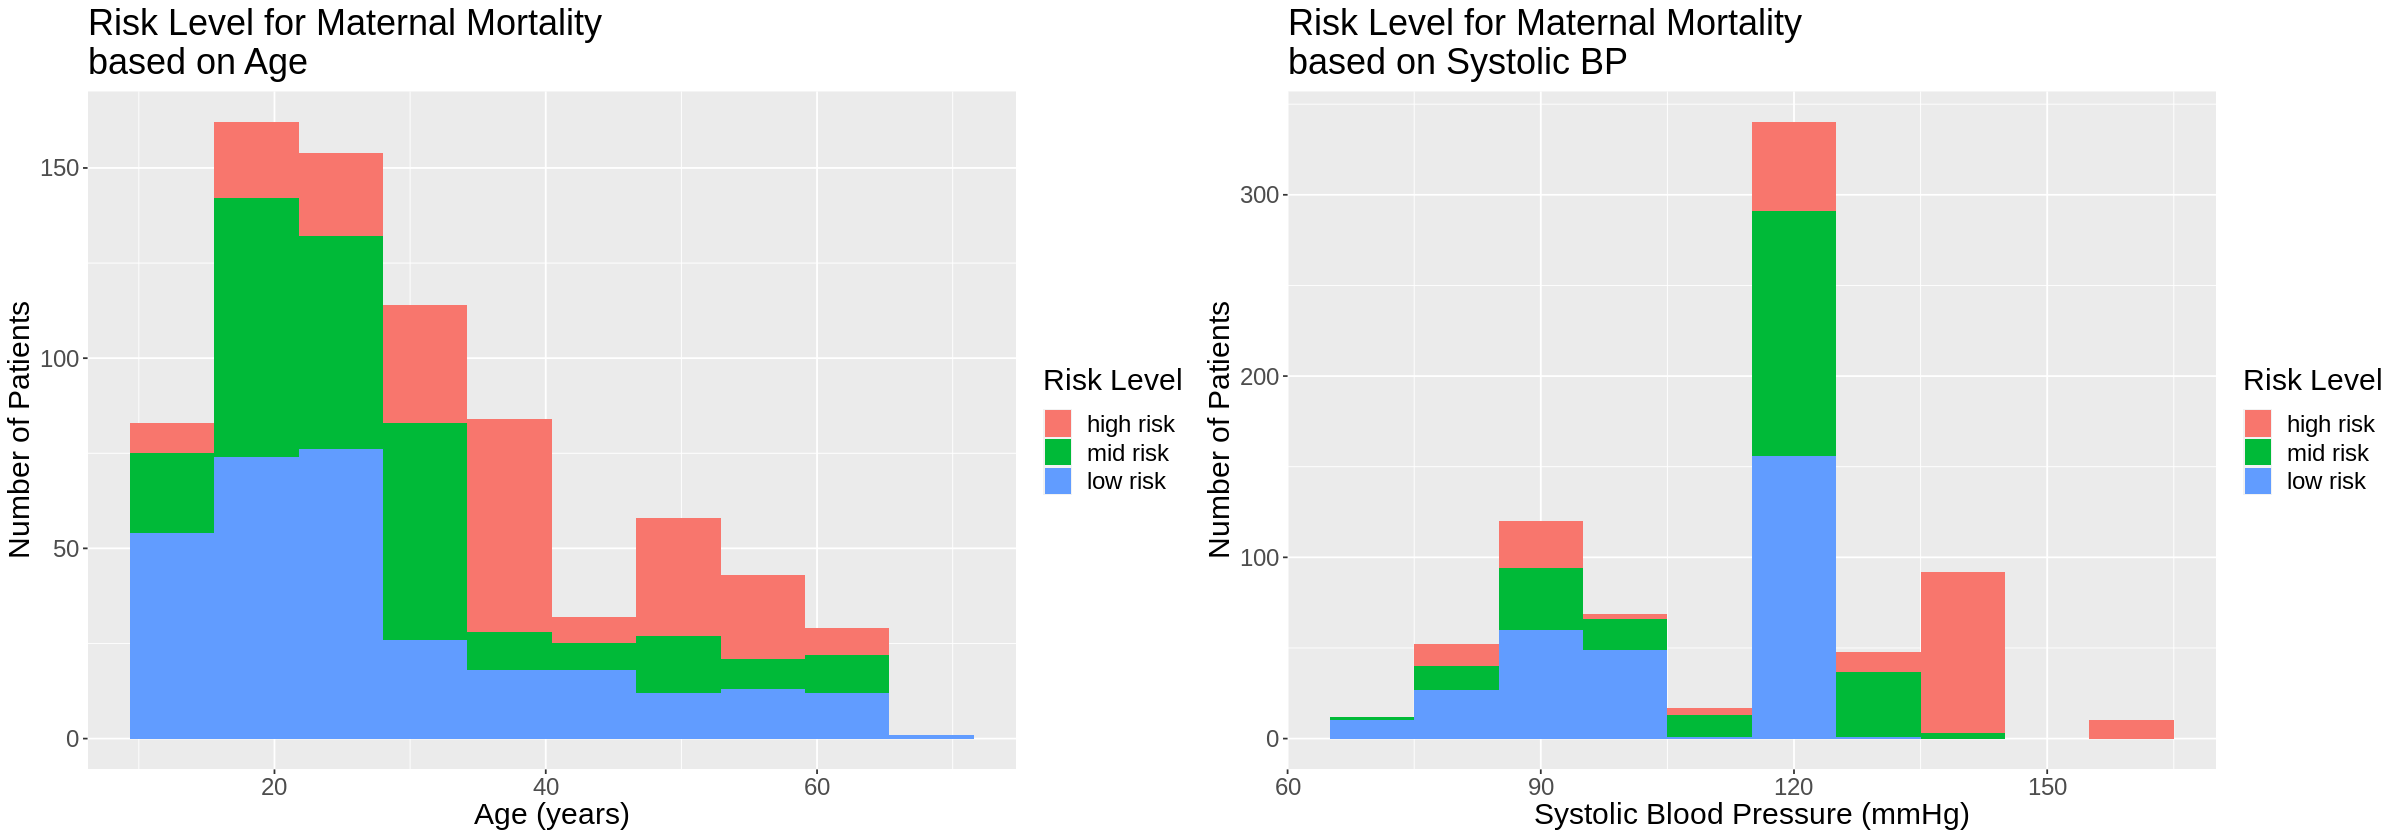

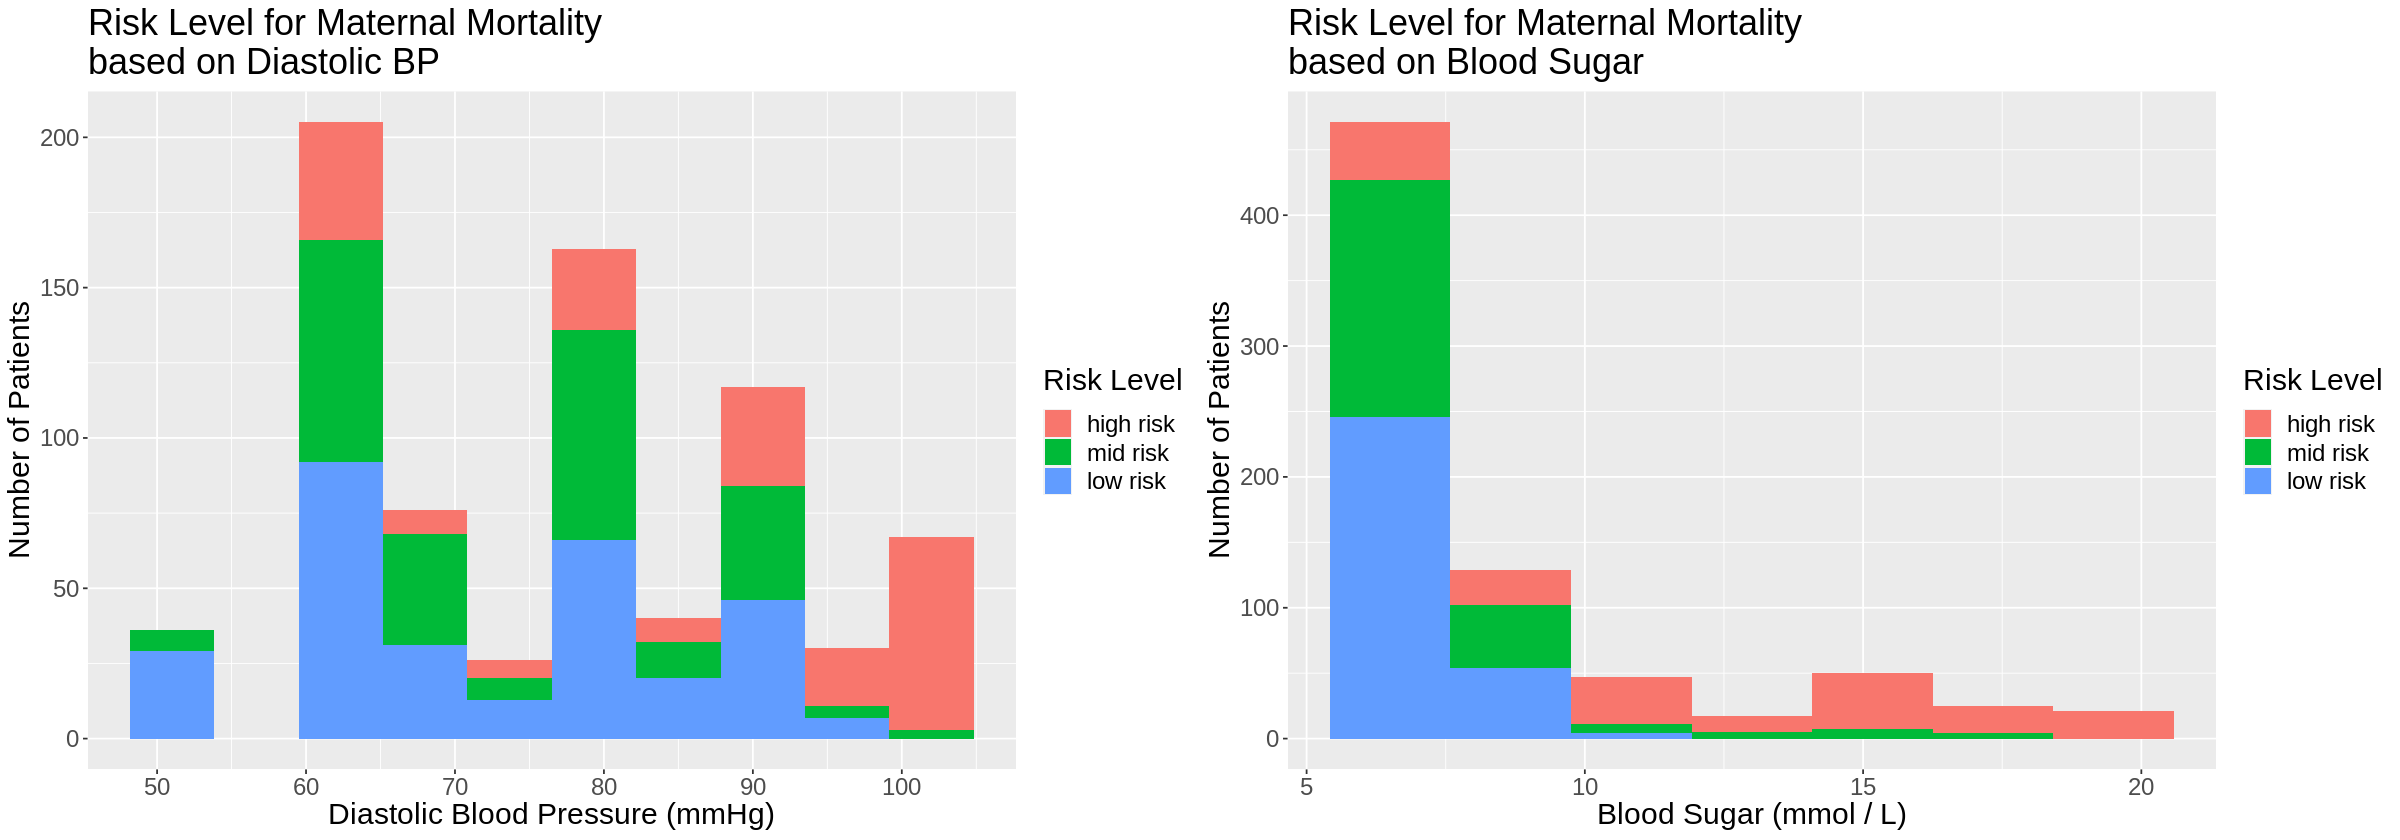

In [8]:
risk_distribution

na

high_risk_variable_range
mid_risk_variable_range
low_risk_variable_range


options(repr.plot.height = 7, repr.plot.width = 20)
grid.arrange(age_histogram, systolic_histogram, nrow = 1)
grid.arrange(diastolic_histogram, bs_histogram, nrow = 1)

### Methods

To conduct our data analysis, we will create tables and visualizations based on our chosen variables. We will then use the KNN classification algorithm with a 5-fold cross-validation to find the best K to use for our prediction. Using this K, we will perform our classification and gather its accuracy. The variables we will use in our analysis are age, systolic BP, diastolic BP, and blood sugar. These variables were chosen by visualizing the distribution of the classes for each variable individually and examining its co-relationship with each class. The variables also aligned with our intuitive knowledge of the severity of each risk factor. 
To visualize our results, we will first determine the model’s test accuracy and illustrate this with a confusion matrix to compare the true versus predicted classes. This will give us insight into the kind of errors the classifier makes. Then, we will utilize a bar graph to visualize how accurate the classifier is at predicting each class, along with the number of false positives and false negatives. 
 

### Expected Outcomes and Significance

We expect to find that a higher variance from the homeostatic levels for each variable leads to a higher risk in maternal mortality. We also expect to be able to predict pregnancy risks based on our chosen variables. By determining pregnancy risks, hospitals will be able to save intake time and prioritize at-risk patients appropriately based on their collected vitals. This study can further uncover other possible factors that should be considered, such as specific diseases that affect pregnancy risk level. 